In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from netCDF4 import Dataset
import os
import datetime
#########################################################################
### Notebook para graficar ionogramas de una carpeta con archivos .ngi.
### Requiere que los archivos ya hayan sido descargados en una estructura
### de directorios como la siguiente: ./Data-21-Septiembre-2023/
#########################################################################

In [2]:
def GetMonth(month):
    str_month = ['Enero','Febrero','Marzo','Abril','Mayo', 'Junio','Julio','Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre','Noviembre-Diciembre']
    return str_month[month-1]

In [3]:
def GetArrays(dataPath,ngiFile,year,month,day):
###################################################################
### Función que retorna arreglos con frecuencias (1D), rangos (1D),
### potencia del modo O (2D), string con timestamp y datetime.
### Inputs:
###        dataPath: str - ruta hacia los datos *ngi.
###        nbgiFile: str - nombre de un archivo *ngi
###        year:     int - año.
###        month:    int - mes.
###        day:      int - día
### Outputs: 
###        freqs:     float array (1D) - frequencias del ionograma.
###        ranges:    float array (1D) - rangos del ionograma.
###        mat:       float array (2D) - potencia reflejada. 
###        str_time:  str - timestamp.
###        dt:        datetime.datetime - timestamp.
###################################################################
    ngiData = Dataset(dataPath+os.sep+ngiFile)  # Read data
    xPower=np.array(ngiData.variables["X-mode_power"][:])
    xPowerT=xPower.transpose()  								
    oPower=np.array(ngiData.variables["O-mode_power"][:])
    oPowerT=oPower.transpose()
    tPower=np.array(ngiData.variables["total_power"][:])
    tPowerT=tPower.transpose()
    ranges=np.array(ngiData.variables["Range"][:])
    freqs=np.array(ngiData.variables["Frequency"][:])/1e3  
    hour = np.array(ngiData.variables["hour"][:])#-5
    minute = np.array(ngiData.variables["minute"][:])
    second = np.array(ngiData.variables["second"][:])
    dt = datetime.datetime(year,month,day,hour,minute,second) - datetime.timedelta(hours=5)
    noise = oPowerT.copy()
    noise = np.median(noise,axis=0)
    mat_noise = np.reshape(noise,(1,452))
    mat = oPowerT - mat_noise
    str_time = '%02d:%02d:%02d' % (dt.hour,dt.minute,dt.second)
    print(str_time)

    return freqs, ranges, mat, str_time, dt

In [4]:
##############################################################
######### Definiendo el año y mes ############################
##############################################################
year = 2023
month = 9
str_month = GetMonth(month)
#date = datetime.datetime(year, month,day,12,0,0)
#doy = date.timetuple().tm_yday
#############################################################
#### Cambiar ruta donde guardar los gráficos ################
#############################################################
dir_plots = '/home/jp/Desktop-ROJ/Plots-Boletines/%d/%s/' % (year, str_month)

In [28]:
###############################################################################
#### Cambiar la ruta de los datos y gráficos acordemente.
###############################################################################
dataPath = "/home/jp/Desktop-ROJ/VIPIR/Drawing-ionogram/Data-%02d-%s-%d" % (day,str_month,year)#-27-Noviembre-2022"    # Path to .ngi files
outPath =  "/home/jp/Desktop-ROJ/VIPIR/Drawing-ionogram/Plots-%02d-%s-%d/" % (day,str_month,year)#27-Noviembre-2022"    # Path to save images
#############################################################
#### Almacenando el nombre de los archivos .ngi de la ruta 
#############################################################
ngiList = glob.glob1(dataPath,"*ngi")    # List of .ngi files
#ngiFile = 'JM91J_2023264001804.ngi'#'JM91J_2023287003804.ngi'

JM91J_2023264001804.ngi


In [ ]:
color_map = 'viridis'#'viridis'#'hot'
for ngiFile in sorted(ngiList):
    print(ngiFile)
    freqs, ranges, mat, str_time, dt = GetArrays(dataPath,ngiFile,year,month,day)
    fig, ax = plt.subplots(figsize=(12, 6))	
    clrs = ax.pcolormesh(freqs, ranges, mat,cmap=color_map)
    ax.grid(False)
    ax.set_xlabel("Frecuencia (MHz)", fontsize=16)
    ax.set_ylabel("Rango (km)", fontsize=17)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    fig_title = r'VIPIR JRO %02d-%02d-%d %s' % (dt.day,dt.month,dt.year,str_time)
    plt.title(fig_title, fontsize=20)
    box=ax.get_position()
    cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
    cb=plt.colorbar(clrs,cax=cbarax)
    cb.set_label(r'SNR [dB]', fontsize=17)
    cb.mappable.set_clim(0,90)
    str_title = 'ionogram-%02d-%02d-%d %s' % (dt.day,dt.month,dt.year,str_time)
    plt.savefig(outPath+str_title+"-%s-"% color_map+".png",bbox_inches="tight")

JM91J_2023264000304.ngi
19:03:04
JM91J_2023264000804.ngi
19:08:04
JM91J_2023264001304.ngi
19:13:04
JM91J_2023264001804.ngi
19:18:04
JM91J_2023264002304.ngi
19:23:04
JM91J_2023264002804.ngi
19:28:04
JM91J_2023264003304.ngi
19:33:04
JM91J_2023264003804.ngi
19:38:04
JM91J_2023264004304.ngi
19:43:04
JM91J_2023264004804.ngi
19:48:04
JM91J_2023264005304.ngi
19:53:04
JM91J_2023264005804.ngi
19:58:04
JM91J_2023264010304.ngi
20:03:04
JM91J_2023264010804.ngi
20:08:04
JM91J_2023264011304.ngi
20:13:04
JM91J_2023264011804.ngi
20:18:04
JM91J_2023264012304.ngi
20:23:04
JM91J_2023264012804.ngi
20:28:04
JM91J_2023264013304.ngi
20:33:04
JM91J_2023264013804.ngi
20:38:04
JM91J_2023264014304.ngi
20:43:04


/tmp/ipykernel_18844/2880825556.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12, 6))


JM91J_2023264014804.ngi
20:48:04
JM91J_2023264015304.ngi
20:53:04
JM91J_2023264015804.ngi
20:58:04
JM91J_2023264020304.ngi
21:03:04
JM91J_2023264020804.ngi
21:08:04
JM91J_2023264021304.ngi
21:13:04
JM91J_2023264021804.ngi
21:18:04
JM91J_2023264022304.ngi
21:23:04
JM91J_2023264022804.ngi
21:28:04
JM91J_2023264023304.ngi
21:33:04
JM91J_2023264023804.ngi
21:38:04
JM91J_2023264024304.ngi
21:43:04
JM91J_2023264024804.ngi
21:48:04
JM91J_2023264025304.ngi
21:53:04
JM91J_2023264025804.ngi
21:58:04
JM91J_2023264030304.ngi
22:03:04
JM91J_2023264030804.ngi
22:08:04
JM91J_2023264031304.ngi
22:13:04
JM91J_2023264031804.ngi
22:18:04
JM91J_2023264032304.ngi
22:23:04
JM91J_2023264032804.ngi
22:28:04
JM91J_2023264033304.ngi
22:33:04
JM91J_2023264033804.ngi
22:38:04
JM91J_2023264034304.ngi
22:43:04
JM91J_2023264034804.ngi
22:48:04
JM91J_2023264035304.ngi
22:53:04
JM91J_2023264035804.ngi
22:58:04
JM91J_2023264040304.ngi
23:03:04
JM91J_2023264040804.ngi
23:08:04
JM91J_2023264041304.ngi
23:13:04
JM91J_2023

In [21]:
ngiFile1 = "JM91J_2023%03d140804.ngi" % doy
ngiFile2 = "JM91J_2023%03d141804.ngi" % doy
ngiFile3 = "JM91J_2023%03d142304.ngi" % doy
ngiFile4 = "JM91J_2023%03d143304.ngi" % doy

In [22]:
freqs1, ranges1, mat1, str_time1, dt1 = GetArrays(dataPath,ngiFile1,year,month,day)
freqs2, ranges2, mat2, str_time2, dt2 = GetArrays(dataPath,ngiFile2,year,month,day)
freqs3, ranges3, mat3, str_time3, dt3 = GetArrays(dataPath,ngiFile3,year,month,day)
freqs4, ranges4, mat4, str_time4, dt4 = GetArrays(dataPath,ngiFile4,year,month,day)

09:08:04
09:18:04
09:23:04
09:33:04


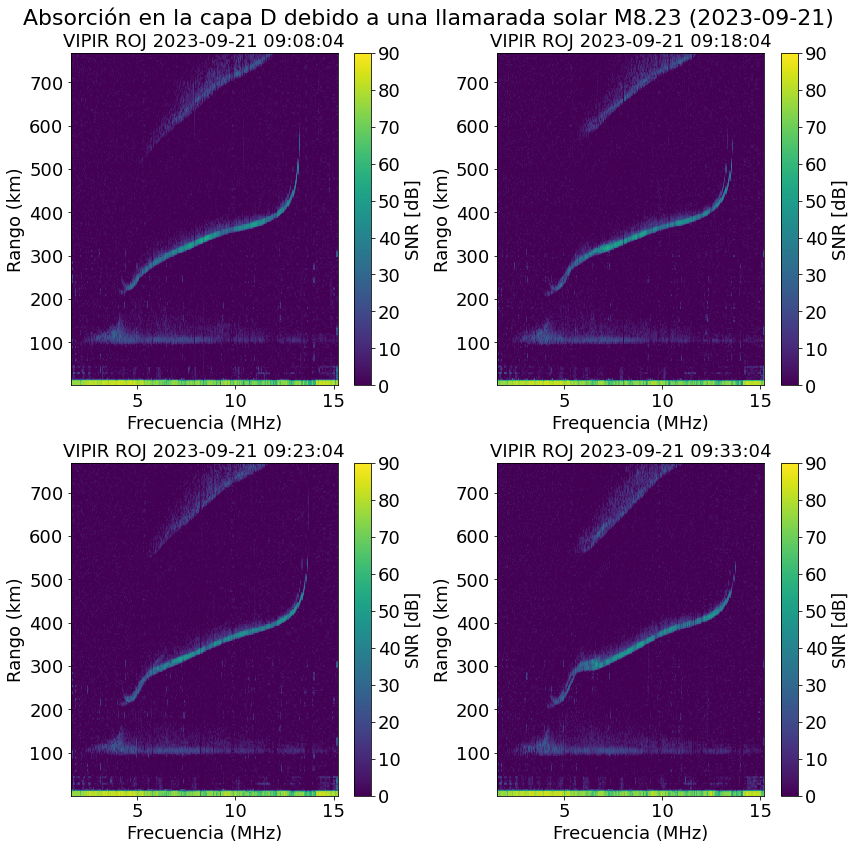

In [23]:
cb_down, cb_up = 0,90#e11
color_map='viridis'
fig, ax = plt.subplots(2, 2, figsize=(12,12),tight_layout=True)
clrs1 = ax[0,0].pcolormesh(freqs1, ranges1, mat1,cmap=color_map)
fig_title1 = r'VIPIR ROJ %d-%02d-%02d %s' % (year,month,day,str_time1)
ax[0,0].set_title(fig_title1,fontsize=18)
ax[0,0].xaxis.set_tick_params(labelsize=18)
ax[0,0].yaxis.set_tick_params(labelsize=18)
ax[0,0].set_xlabel("Frecuencia (MHz)", fontsize=18)
ax[0,0].set_ylabel("Rango (km)", fontsize=18)
cb1 = plt.colorbar(clrs1,ax=ax[0,0])
cb1.set_label(r'SNR [dB]', fontsize=18)
cb1.mappable.set_clim(cb_down, cb_up)
cb1.ax.tick_params(labelsize=18)

clrs2 = ax[0,1].pcolormesh(freqs2, ranges2, mat2,cmap=color_map)
fig_title2 =  r'VIPIR ROJ %d-%02d-%02d %s' % (year,month,day,str_time2)
ax[0,1].set_title(fig_title2,fontsize=18)
ax[0,1].xaxis.set_tick_params(labelsize=18)
ax[0,1].yaxis.set_tick_params(labelsize=18)
ax[0,1].set_xlabel("Frequencia (MHz)", fontsize=18)
ax[0,1].set_ylabel("Rango (km)", fontsize=18)
cb2 = plt.colorbar(clrs2,ax=ax[0,1])
cb2.set_label(r'SNR [dB]', fontsize=18)
cb2.mappable.set_clim(cb_down, cb_up)
cb2.ax.tick_params(labelsize=18)

clrs3 = ax[1,0].pcolormesh(freqs3, ranges3, mat3,cmap=color_map)
fig_title3 =  r'VIPIR ROJ %d-%02d-%02d %s' % (year,month,day,str_time3)
ax[1,0].set_title(fig_title3,fontsize=18)
ax[1,0].xaxis.set_tick_params(labelsize=18)
ax[1,0].yaxis.set_tick_params(labelsize=18)
ax[1,0].set_xlabel("Frecuencia (MHz)", fontsize=18)
ax[1,0].set_ylabel("Rango (km)", fontsize=18)
cb3 = plt.colorbar(clrs3,ax=ax[1,0])
cb3.set_label(r'SNR [dB]', fontsize=17)
cb3.mappable.set_clim(cb_down, cb_up)
cb3.ax.tick_params(labelsize=18)

clrs3 = ax[1,1].pcolormesh(freqs4, ranges4, mat4,cmap=color_map)
fig_title4 =  r'VIPIR ROJ %d-%02d-%02d %s' % (year,month,day,str_time4)
ax[1,1].set_title(fig_title4,fontsize=18)
ax[1,1].xaxis.set_tick_params(labelsize=18)
ax[1,1].yaxis.set_tick_params(labelsize=18)
ax[1,1].set_xlabel("Frecuencia (MHz)", fontsize=18)
ax[1,1].set_ylabel("Rango (km)", fontsize=18)
cb3 = plt.colorbar(clrs3,ax=ax[1,1])
cb3.set_label(r'SNR [dB]', fontsize=17)
cb3.mappable.set_clim(cb_down, cb_up)
cb3.ax.tick_params(labelsize=18)
fig.suptitle('Absorción en la capa D debido a una llamarada solar M8.23 (%d-%02d-%02d)' % (year,month,day), fontsize=22)
plt.savefig("%s/d-layer-absorption-%02d-%02d-%d-solar-flares.pdf" % (dir_plots,year,month,day),bbox_inches="tight")

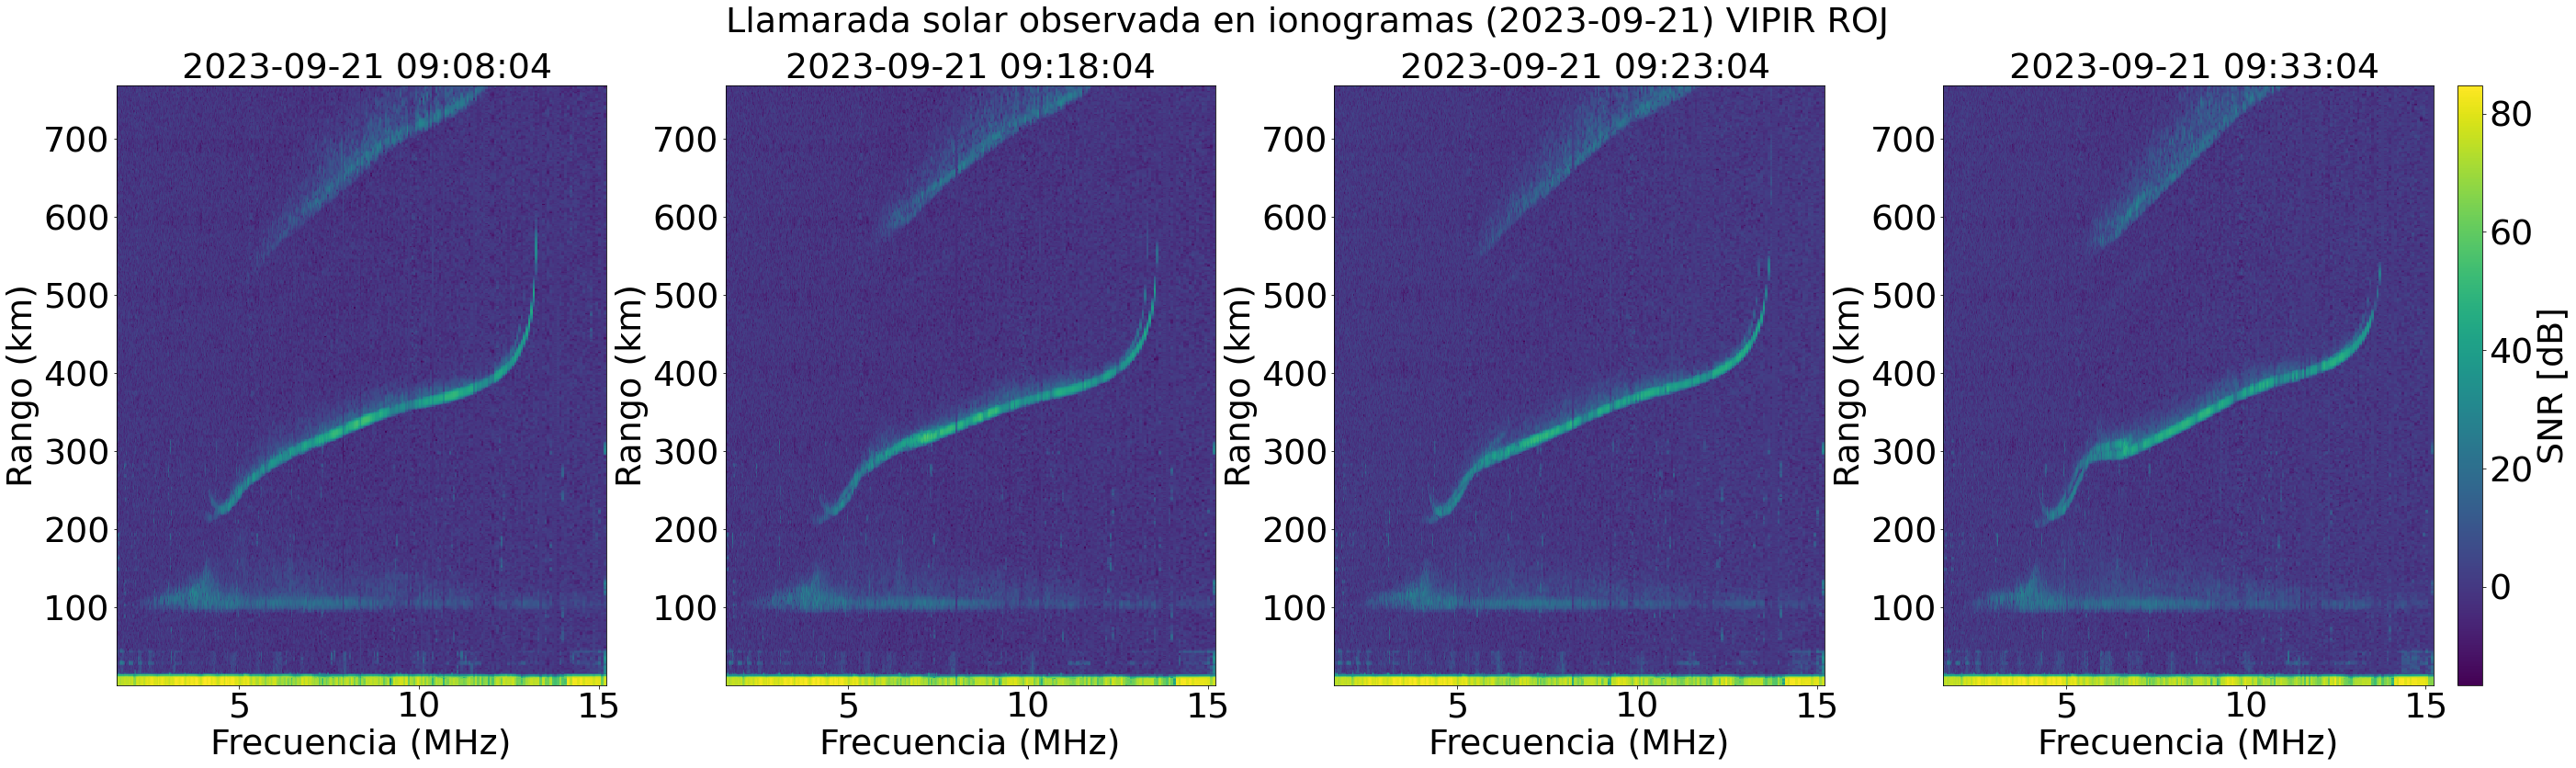

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

cb_down, cb_up = 0,90#e11
color_map='viridis'
fontsize=38
fig, (ax, ax2, ax3, ax4,cax) = plt.subplots(ncols=5,figsize=(48,12), 
                  gridspec_kw={"width_ratios":[1,1,1,1, 0.05]})
fig.subplots_adjust(wspace=0.3)
clrs1 = ax.pcolormesh(freqs1, ranges1, mat1,cmap=color_map)
fig_title1 = r' %d-%02d-%02d %s' % (year,month,day,str_time1)
ax.set_title(fig_title1,fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_xlabel("Frecuencia (MHz)", fontsize=fontsize)
ax.set_ylabel("Rango (km)", fontsize=fontsize)

clrs2 = ax2.pcolormesh(freqs2, ranges2, mat2,cmap=color_map)
fig_title2 =  r'%d-%02d-%02d %s' % (year,month,day,str_time2)
ax2.set_title(fig_title2,fontsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=fontsize)
ax2.yaxis.set_tick_params(labelsize=fontsize)
ax2.set_xlabel("Frecuencia (MHz)", fontsize=fontsize)
ax2.set_ylabel("Rango (km)", fontsize=fontsize)

clrs3 = ax3.pcolormesh(freqs3, ranges3, mat3,cmap=color_map)
fig_title3 =  r' %d-%02d-%02d %s' % (year,month,day,str_time3)
ax3.set_title(fig_title3,fontsize=fontsize)
ax3.xaxis.set_tick_params(labelsize=fontsize)
ax3.yaxis.set_tick_params(labelsize=fontsize)
ax3.set_xlabel("Frecuencia (MHz)", fontsize=fontsize)
ax3.set_ylabel("Rango (km)", fontsize=fontsize)

clrs4 = ax4.pcolormesh(freqs4, ranges4, mat4,cmap=color_map)
fig_title4 =  r' %d-%02d-%02d %s' % (year,month,day,str_time4)
ax4.set_title(fig_title4,fontsize=fontsize)
ax4.xaxis.set_tick_params(labelsize=fontsize)
ax4.yaxis.set_tick_params(labelsize=fontsize)
ax4.set_xlabel("Frecuencia (MHz)", fontsize=fontsize)
ax4.set_ylabel("Rango (km)", fontsize=fontsize)
ip = InsetPosition(ax4, [1.05,0,0.05,1]) 
cax.set_axes_locator(ip)

cb4 = fig.colorbar(clrs4, cax=cax, ax=[ax,ax2,ax3,ax4])#,fontsize=fontsize)
cb4.set_label(r'SNR [dB]', fontsize=fontsize)
cb4.ax.tick_params(labelsize=fontsize)
fig.suptitle('Llamarada solar observada en ionogramas (%d-%02d-%02d) VIPIR ROJ' % (year,month,day), fontsize=fontsize)
plt.savefig("Figura5.pdf",bbox_inches="tight")